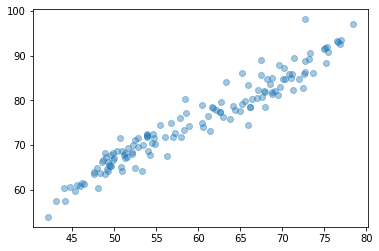

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataQ2 = np.load("data.npy")
import matplotlib.pyplot as plt
import time
import math
#print(dataQ2)
plt.scatter(dataQ2[:,0],dataQ2[:,1], alpha = 0.4)
plt.show()

In [3]:
data = np.load("data.npy")
DataFrame = pd.DataFrame(data, columns = ['X','Y'])
print(DataFrame)

             X          Y
0    52.819990  71.555381
1    54.528225  70.479816
2    52.436903  64.972205
3    53.995550  68.647111
4    50.882052  68.691166
..         ...        ...
135  56.078845  71.695843
136  53.331914  64.097364
137  61.176324  76.583584
138  60.397733  74.893662
139  65.542130  79.787110

[140 rows x 2 columns]


In [4]:
print(len(data))


140


In [5]:
x = DataFrame.values[:140, 0]
y = DataFrame.values[:140, 1:]

In [6]:
print(type(x))
print(type(y))
#y = y.T
ynew = y[:,0]
y = ynew
print(x.shape)
print(y.shape)
#print(x)
total = x+y
print(x[1])
print(y[1])
#print(total[1])
#print(total.shape)
#len(x)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(140,)
(140,)
54.528225389549505
70.47981622760551


In [7]:
print(x)
print(y)
#x = np.array([-2,2,3,5,4])
#y = np.array([2,4,8,11,17])
#print(x)
#print(y)

[52.8199901  54.52822539 52.43690264 53.99555046 50.88205156 43.10332679
 52.07851854 44.03117848 51.22455373 53.92957463 52.42968976 50.92451368
 58.57022209 53.36138938 54.6279133  42.14858968 47.5370655  46.40488666
 49.99354262 52.10536577 52.79844649 54.73795485 49.41236591 54.79581022
 46.13538552 49.61186033 49.25512278 51.54671819 50.69523941 57.83162087
 48.47505943 49.43811272 47.57453239 50.31446078 50.8110689  49.24335753
 53.84838807 48.89213514 51.67044226 48.00978377 51.2056149  49.8611156
 52.22857945 55.42225889 44.11447895 51.27393917 48.59441365 47.9668102
 45.33408815 45.86241221 60.49885166 49.15132343 48.9812641  48.85536843
 53.94182742 49.65093102 44.67384982 49.90116185 48.30214522 45.57072629
 67.89168613 66.18532272 66.18532272 64.40684608 78.36867418 70.778456
 63.24871406 66.42032911 67.82850118 58.466383   68.72762393 75.41859588
 76.93058449 75.10929128 68.56246423 70.98230514 56.72854522 76.53451387
 57.19049175 67.44959294 63.73816651 58.26257763 71.292

In [8]:
def gradient_of_b0(x,y,b1,b0,alpha):
    n, = x.shape
    #n,m = x.shape
    stuff = sum(-2*(y-((b1*x)+b0)))
    b0 = b0 - alpha*((1/n)*stuff) 
    return b0

#print(gradient_of_b0(x,y,b1,b0,alpha))

In [9]:
def gradient_of_b1(x,y,b1,b0,alpha):
    n, = x.shape 
    stuff = sum(np.multiply((-2*x),(y-((b1*x)+b0))))
    b1 = b1 - alpha*((1/n)*stuff) 
    return b1

#print(gradient_of_b1(x,y,b1,b0,alpha))

In [10]:
def MSE_function(x,y,b0,b1):
    n, = x.shape
    stuff = (y-((b1*x)+b0))**2
    MSE = (1/n)*sum(stuff)
    return MSE


(140,)
(140,)
End Condition Reached
1.2339262572009058
1.233808298999193
1
My Theta0 is: 1.233808298999193 and my Theta1 is: 1.2339262572009058


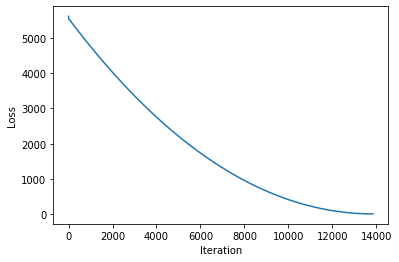

In [11]:
#prev = 10000000
print(x.shape)
print(y.shape)
#max_iter = 10
b1 = 0
b0 = 0
def checkfun(x,y,b0,b1,max_iter=100000,alpha=0.0001):
    #n,m =x.shape
    BreakCondition = 0
    n, = x.shape 
    loss_history = []
    #prev = 10000000
    for iteration in range(int(max_iter)):
        b1 = gradient_of_b1(x,y,b1,b0,alpha)
        b0 = gradient_of_b0(x,y,b1,b0,alpha)
        MSEnew = MSE_function(x, y, b1, b0)
        loss_history.append(MSEnew)
        if len(loss_history) < 2:
            skip = 0
        else:
            EndCondition = loss_history[iteration-1] - loss_history[iteration] 
            if abs(EndCondition) < .0001:
                print("End Condition Reached")
                BreakCondition = 1
                break 
    return MSEnew, loss_history, b1, b0, BreakCondition 

MSEnew, loss_history, b1, b0, BreakCondition = checkfun(x,y,b0,b1)
b0_real = b0
b1_real = b1
print(b1_real)
print(b0_real)
print(BreakCondition)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(np.arange(len(loss_history)), loss_history)
print("My Theta0 is: " + str(b0_real) + " and my Theta1 is: " + str(b1_real))

(140,)
(140,)


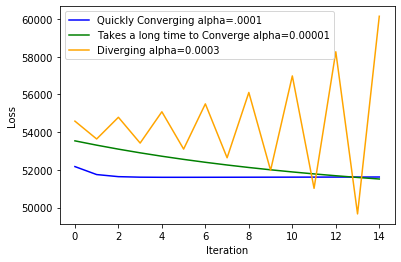

In [12]:
#prev = 10000000
print(x.shape)
print(y.shape)
#max_iter = 10
b1 = 5
b0 = 5

def checkfun(x,y,b0,b1,max_iter=100000,alpha=0.0001):
    BreakCondition = 0
    #alpha = .11
    #n,m =x.shape
    n, = x.shape 
    loss_history = []
    #prev = 10000000
    for iteration in range(int(max_iter)):
        b1 = gradient_of_b1(x,y,b1,b0,alpha)
        b0 = gradient_of_b0(x,y,b1,b0,alpha)
        MSEnew = MSE_function(x, y, b1, b0)
        loss_history.append(MSEnew)
        if len(loss_history) < 2:
            skip = 0
        else:
            EndCondition = loss_history[iteration-1] - loss_history[iteration]  
            if abs(EndCondition) < .0001:
                BreakCondition = 1
                print("End Condition Reached")
                break 
    return MSEnew, loss_history, b1, b0, BreakCondition 

MSEnew_1, loss_history1, b1_1, b0_1, BreakCondition = checkfun(x,y,b0,b1,max_iter=15,alpha=0.0001)
MSEnew_2, loss_history2, b1_1, b0_2, BreakCondition = checkfun(x,y,b0,b1,max_iter=15,alpha=0.00001)
MSEnew_3, loss_history3, b1_3, b0_3, BreakCondition = checkfun(x,y,b0,b1,max_iter=15,alpha=0.0003)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(np.arange(len(loss_history1)), loss_history1,c="blue",label="Quickly Converging alpha=.0001")
plt.plot(np.arange(len(loss_history2)), loss_history2,c="green", label="Takes a long time to Converge alpha=0.00001")
plt.plot(np.arange(len(loss_history3)), loss_history3,c="orange", label="Diverging alpha=0.0003")
plt.legend()

In [ ]:
#The best learning rate is .0001 because it converges the fastest. 
# Although .000001 converges it requires more iterations 
#.0003 diverges immediately 

1.2339262572009058
1.233808298999193


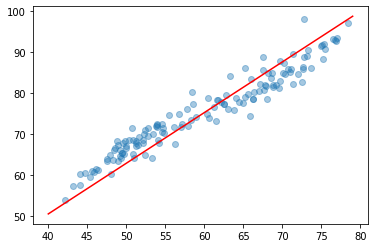

In [13]:
#plt.scatter(dataQ2[:,0],dataQ2[:,1], alpha = 0.4)
plt.scatter(x,y, alpha = 0.4)
xnew = np.array(range(40,80))
print(b1_real)
print(b0_real)
ynew = b1_real*xnew + b0_real
plt.plot(xnew,ynew, c="red")

In [14]:
#The best learning rate is 0.0001 because it converges quickly without diverging  

In [15]:
b1 = 0
b0 = 0
BreakCondition = 0
for value in range (100):
    alpha=(1/((value+1)*100))

    MSEnew_3, loss_history, b1_3, b0_3, BreakCondition = checkfun(x,y,b0,b1,max_iter=10000,alpha=alpha)
    #print(BreakCondition)
    if BreakCondition == 1:
        print("Anything at this value or less will converge: ")
        print(alpha)
        break


C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


End Condition Reached
Anything at this value or less will converge: 
0.0002631578947368421


In [16]:
b1 = 0
b0 = 0
BreakCondition = 1
for value in range (5000):
    alpha=(value*.0001)
    MSEnew_3, loss_history, b1_3, b0_3, BreakCondition = checkfun(x,y,b0,b1,max_iter=100000,alpha=alpha)
    #print(BreakCondition)
    if BreakCondition == 0:
        print("Anything at this value or higher will Diverge: ")
        print(alpha)
        break

End Condition Reached
End Condition Reached
End Condition Reached


C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


Anything at this value or higher will Diverge: 
0.00030000000000000003


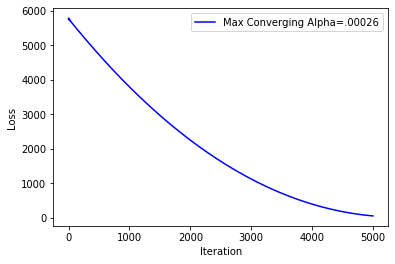

In [17]:
MSEnew_1, loss_history1, b1_1, b0_1, BreakCondition = checkfun(x,y,b0,b1,max_iter=5000,alpha=0.00026)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(np.arange(len(loss_history1)), loss_history1,c="blue",label="Max Converging Alpha=.00026")
plt.legend()

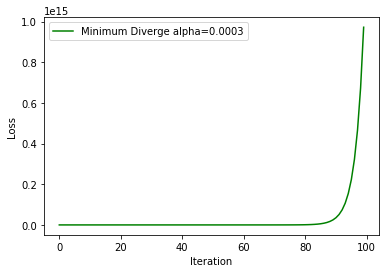

In [18]:
MSEnew_2, loss_history2, b1_1, b0_2, BreakCondition = checkfun(x,y,b0,b1,max_iter=100,alpha=0.0003)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(np.arange(len(loss_history2)), loss_history2,c="green", label="Minimum Diverge alpha=0.0003")
plt.legend()

In [19]:
#The maximum learning rate is alpha=0.000263157 as this is the largest learning rate we can use without diverging 

In [20]:
#Batch Algorithm
def Batch_Function(random = 0):
    N = 140
    batch_size = 20
    idx = np.random.randint(random,N,[batch_size])
    x_batch = x[idx]
    y_batch = y[idx]
    return x_batch, y_batch

#Batch_Function(random=0)

In [21]:
x_batch, y_batch = Batch_Function()

print(x_batch)
print(y_batch)

[76.93058449 62.06812722 67.89168613 51.67044226 49.90116185 51.67044226
 44.11447895 52.43690264 73.69306848 44.11447895 71.09646149 75.14595398
 73.13542058 72.62655212 48.59441365 65.54213042 54.73795485 54.73795485
 70.15841341 66.18532272]
[93.44564174 77.73831181 81.8242318  69.32863723 66.69203861 69.32863723
 57.54103635 64.97220518 86.19255448 57.54103635 85.76377473 88.33159424
 89.12145074 85.92369891 66.63550225 79.78710991 71.49611271 71.49611271
 87.29550136 78.58661117]


In [22]:
def gradient_of_b0_batch(x_batch,y_batch,b1_batch,b0_batch,alpha):
    n=20
    #n = 140
    #n,m = x.shape
    stuff = sum(-2*(y_batch-((b1_batch*x_batch)+b0_batch)))
    b0_batch = b0_batch - alpha*((1/n)*stuff) 
    return b0_batch

In [23]:
def gradient_of_b1_batch(x_batch,y_batch,b1_batch,b0_batch,alpha):
    n = 20
    #n=140
    stuff = sum(np.multiply((-2*x_batch),(y_batch-((b1_batch*x_batch)+b0_batch))))
    b1_batch = b1_batch - alpha*((1/n)*stuff) 
    return b1_batch


In [24]:
def MSE_function_batch(y_batch,x_batch,b0_batch,b1_batch):
    n = 20
    #n=140
    #n,m = x.shape
    #print(n)
    stuff = (y_batch-((b1_batch*x_batch)+b0_batch))**2
    MSE = (1/n)*sum(stuff)
    return MSE

(140,)
(140,)
1.2376603528628431
0.01520461446957262
0
My Theta0 from mini_batch is: 0.01520461446957262 and my Theta1 from mini_batch is:1.2376603528628431


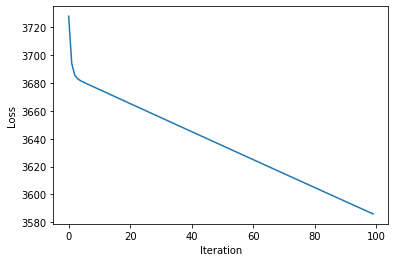

In [25]:
#prev = 10000000
print(x.shape)
print(y.shape)
#max_iter = 10
b1_batch = 0
b0_batch = 0
def checkfun_batch(x_batch,y_batch,b0_batch,b1_batch,max_iter=100,alpha=0.0001):
    #n,m =x.shape
    BreakCondition = 0
    n = 20
    #n = 140
    loss_history = []
    #prev = 10000000
    for iteration in range(int(max_iter)):
        #Randomly Generated Batch 
        #y_batch, x_batch = Batch_Function()
        b1_batch = gradient_of_b1_batch(x_batch,y_batch,b1_batch,b0_batch,alpha)
        b0_batch = gradient_of_b0_batch(x_batch,y_batch,b1_batch,b0_batch,alpha)
        MSEnew = MSE_function_batch(x_batch, y_batch, b1_batch, b0_batch)
        loss_history.append(MSEnew)
        if len(loss_history) < 2:
            skip = 0
        else:
            EndCondition = loss_history[iteration-1] - loss_history[iteration] 
            if abs(EndCondition) < .0001:
                print("End Condition Reached")
                BreakCondition = 1
                break 
    return MSEnew, loss_history, b1_batch, b0_batch, BreakCondition 

MSEnew_batch, loss_history_batch, b1_batch, b0_batch, BreakCondition = checkfun_batch(x_batch,y_batch,b0_batch,b1_batch,max_iter=100)
print(b1_batch)
print(b0_batch)
print(BreakCondition)
print("My Theta0 from mini_batch is: " + str(b0_batch) + " and my Theta1 from mini_batch is:" + str(b1_batch))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(np.arange(len(loss_history_batch)), loss_history_batch)

1.2376603528628431
0.01520461446957262


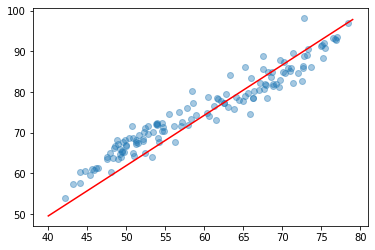

In [26]:
plt.scatter(x,y, alpha = 0.4)
xnew = np.array(range(40,80))
print(b1_batch)
print(b0_batch)
ynew = b1_batch*xnew + b0_batch
plt.plot(xnew,ynew, c="red")

In [27]:
#Iterations for full batch is slower and iterations for mini-bacth 
#are faster as full batch goes over more data
#The minibatch data does not converge as smoothly because the weights
#are updated with less data each iteration